In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.426013102412536473840491086280519425818/1-223.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.16568542011655175430071162144126831780/2-089.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.16568542011655175430071162144126831780/1-111.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.116437756113164247142539498550746659420/1-051.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.116437756113164247142539498550746659420/2-203.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.265953197912973660327069359641506533925/1-288.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295670217913556255928452747763741622478/1-213.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.

In [2]:
calc=pd.read_csv("/kaggle/input/breast-cancer-data-set/mass.csv")
calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 1696 non-null   object 
 1   breast_density             1696 non-null   int64  
 2   left or right breast       1696 non-null   object 
 3   image view                 1696 non-null   object 
 4   abnormality id             1696 non-null   int64  
 5   abnormality type           1696 non-null   object 
 6   mass shape                 1692 non-null   object 
 7   mass margins               1636 non-null   object 
 8   assessment                 1696 non-null   int64  
 9   pathology                  1696 non-null   object 
 10  subtlety                   1696 non-null   int64  
 11  image file path            1696 non-null   object 
 12  cropped image file path    1696 non-null   object 
 13  ROI mask file path         1696 non-null   objec

In [3]:
calc.isna().sum()

patient_id                    0
breast_density                0
left or right breast          0
image view                    0
abnormality id                0
abnormality type              0
mass shape                    4
mass margins                 60
assessment                    0
pathology                     0
subtlety                      0
image file path               0
cropped image file path       0
ROI mask file path            0
StudyInstanceUID              0
image_path                    0
BitsAllocated                 0
BitsStored                    0
BodyPartExamined              0
Columns                       0
ContentDate                   0
ContentTime                   0
ConversionType                0
HighBit                       0
InstanceNumber                0
LargestImagePixelValue        0
Laterality                    0
Modality                      0
PatientID                     0
PatientName                   0
PatientOrientation            0
Photomet

In [4]:
calc_clean=calc.copy()
calc_clean['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
calc_clean['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True)
calc_clean.isna().sum()

patient_id                   0
breast_density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
mass shape                   0
mass margins                 0
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
StudyInstanceUID             0
image_path                   0
BitsAllocated                0
BitsStored                   0
BodyPartExamined             0
Columns                      0
ContentDate                  0
ContentTime                  0
ConversionType               0
HighBit                      0
InstanceNumber               0
LargestImagePixelValue       0
Laterality                   0
Modality                     0
PatientID                    0
PatientName                  0
PatientOrientation           0
PhotometricInterpretation    0
Rows    

In [5]:
calc_work=calc_clean[["pathology","image_path"]]
calc_work.info()
calc_work.describe()
calc_work.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pathology   1696 non-null   object
 1   image_path  1696 non-null   object
dtypes: object(2)
memory usage: 26.6+ KB


,pathology,image_path
0,MALIGNANT,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.245063...
1,MALIGNANT,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.859522...
2,MALIGNANT,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.221311...
3,MALIGNANT,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.239949...
4,BENIGN,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.215081...


In [6]:
image_dir="/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg"

calc_work1=calc_work.copy()



In [7]:
calc_work1['image_path'] = calc_work1['image_path'].apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))


In [8]:
calc_work1['image_path'].head()

0    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
1    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
2    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
3    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
4    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
Name: image_path, dtype: object

In [9]:
df=calc_work1.drop(index=calc_work1[calc_work1["pathology"]== "BENIGN_WITHOUT_CALLBACK"].index)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 0 to 1695
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pathology   1555 non-null   object
 1   image_path  1555 non-null   object
dtypes: object(2)
memory usage: 36.4+ KB


In [10]:
import matplotlib.pyplot as plt
import PIL

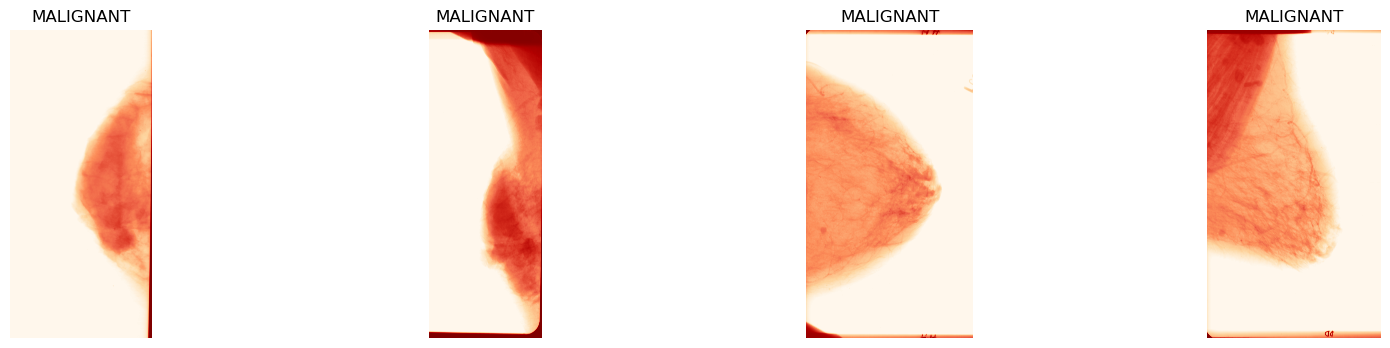

In [11]:
# Create a subplot with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Iterate over the first 4 rows of the DataFrame using the "head" method
for i, row in df.head(4).iterrows():
    # Load the image and convert it to grayscale
    full_mammogram_images_show = PIL.Image.open(row['image_path'])
    gray_img = full_mammogram_images_show.convert("L")
    
    # Show the image in a subplot with its corresponding label
    axs[i].imshow(gray_img, cmap='OrRd')
    axs[i].axis('off')
    axs[i].set_title(row['pathology'])
    
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Split the dataset into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Define the ImageDataGenerator for preprocessing the images
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2, 
                             height_shift_range=0.2,
                             horizontal_flip=True)

In [13]:
# Define the batch size and input shape for the CNN model
batch_size = 32
img_shape = (224, 224, 3)

In [14]:
import tensorflow as tf

image input


In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                    directory="./",
                                                    x_col="image_path",
                                                    y_col="pathology",
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    subset="training",
                                                    shuffle=True,
                                                    seed=42)
valid_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                    directory="./",
                                                    x_col="image_path",
                                                    y_col="pathology",
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    subset="validation",
                                                    shuffle=True,
                                                    seed=42)

# define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# train the model
filepath="saved_models/model-{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10,
                    callbacks=callbacks_list)

# save the final model
model.save("final_model.h5")

Found 1244 validated image filenames belonging to 2 classes.
Found 311 validated image filenames belonging to 2 classes.
Epoch 1/10
39/39 [==============================] - ETA: 0s - loss: 0.6922 - acc: 0.5000
Epoch 1: val_loss improved from inf to 0.71300, saving model to saved_models/model-01-0.71.h5
39/39 [==============================] - 285s 7s/step - loss: 0.6922 - acc: 0.5000 - val_loss: 0.7130 - val_acc: 0.4244
Epoch 2/10
39/39 [==============================] - ETA: 0s - loss: 0.6900 - acc: 0.5257
Epoch 2: val_loss improved from 0.71300 to 0.70226, saving model to saved_models/model-02-0.70.h5
39/39 [==============================] - 223s 6s/step - loss: 0.6900 - acc: 0.5257 - val_loss: 0.7023 - val_acc: 0.4630
Epoch 3/10
39/39 [==============================] - ETA: 0s - loss: 0.6882 - acc: 0.5531
Epoch 3: val_loss improved from 0.70226 to 0.69618, saving model to saved_models/model-03-0.70.h5
39/39 [==============================] - 224s 6s/step - loss: 0.6882 - acc: 0.5531

In [16]:
# create an input widget to upload an image for prediction



import io
import numpy as np
import tensorflow as tf
from PIL import Image
import ipywidgets as widgets

In [17]:


# Load the saved model
model = tf.keras.models.load_model('final_model.h5')

# Define the label names
label_names = ['label0', 'label1']

# Define the function to make predictions
def predict_image(btn):
    uploaded_file = list(file_upload.value.values())[0]['content']
    img = Image.open(io.BytesIO(uploaded_file))
    img = img.resize((128, 128))
    img = np.asarray(img)/255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)[0][0]
    if pred > 0.5:
        label.value = "Image is {}".format(label_names[1])
    else:
        label.value = "Image is {}".format(label_names[0])

# Define the input widget
file_upload = widgets.FileUpload(accept='image/*')
label = widgets.Label()

# Display the input widget and the label
display(file_upload)
display(widgets.Button(description='Predict', onclick=predict_image))
display(label)


FileUpload(value={}, accept='image/*', description='Upload')

Button(description='Predict', style=ButtonStyle())

Label(value='')